# O que vende um carro?

Recebemos centenas de propagandas gratuitas de veículos em nosso site todos os dias. Precisamos estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Introdução ao projeto

Este projeto tem como objetivo explorar um conjunto de dados contendo informações sobre veículos à venda nos EUA e realizar uma análise exploratória desses dados. Iniciando com o pré-processamento dos dados, iremos identificar valores ausentes e, quando apropriado, preenchê-los, além de converter os dados para os tipos necessários. Em seguida, iremos adicionar algumas colunas importantes para a análise, como dia da semana, mês e ano da propaganda, idade do veículo e média de quilometragem por ano. Também iremos substituir os valores de string na coluna "condition" por uma escala numérica.

Na etapa de análise exploratória, iremos estudar vários parâmetros importantes, como preço, idade do veículo, quilometragem, número de cilindros e condição, construindo histogramas para cada um deles e estudando como os valores atípicos afetam a forma e a legibilidade dos histogramas. Também iremos determinar os limites superiores de valores atípicos e removê-los, construindo novos histogramas com os dados filtrados e comparando-os com os histogramas anteriores. Em seguida, iremos analisar o tempo de vida útil de uma propaganda e determinar quando as propagandas foram removidas rapidamente e quando foram listadas por um tempo anormalmente longo.

Iremos também analisar o número de propagandas e o preço médio para cada tipo de veículo, construindo um gráfico para mostrar a dependência do número de propagandas em relação ao tipo de veículo e selecionando os dois tipos com o maior número de propagandas. Finalmente, iremos estudar quais fatores mais influenciam o preço, analisando se ele depende da idade, quilometragem, condição, tipo de transmissão e cor. Ao analisar variáveis categóricas, é importante observar que as categorias precisam ter pelo menos 50 propagandas para que seus parâmetros sejam válidos para análise.

Todos esses passos serão realizados neste notebook Jupyter, utilizando células de código e células Markdown para explicação e formatação. Ao final, iremos concluir nossas descobertas e insights obtidos a partir desta análise exploratória de dados.

## Objetivo do projeto


* 		Estude os seguintes parâmetros: preço, idade do veículo quando a propaganda foi colocada, quilometragem, número de cilindros, e condição. Construa histogramas para cada um desses parâmetros. Estude como valores atípicos afetam a forma e a legibilidade dos histogramas.

* 		Determine os limites superiores de valores atípicos, remova os valores atípicos, armazene-os em um DataFrame separado e continue seu trabalho com os dados filtrados.

* 		Use os dados filtrados para construir novos histogramas. Compare-os com os histogramas anteriores (aqueles que incluem valores atípicos). Tire conclusões para cada histograma.

* 		Estude quantos dias as propagandas foram exibidas (days_listed). Construa um histograma. Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.

* 		Analise o número de propagandas e o preço médio para cada tipo de veículo. Construa um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. Selecione os dois tipos com o maior número de propagandas.

* 		Que fatores mais influenciam o preço? Pegue cada um dos tipos populares que você detectou no estágio anterior e estude se o preço depende da idade, quilometragem, condição, tipo de transmissão e cor. Para variáveis categóricas (tipo de transmissão e cor), construa gráficos de extremos e quartis, e crie gráficos de dispersão para o restante. Ao analisar variáveis categóricas, note que as categorias precisam ter pelo menos 50 propagandas; de outro modo, seus parâmetros não serão válidos para análise.

## Iniciação


Iremos carregar nossas bibliotecas para trabalhar. 

Vamos utilizar Pandas como de padrão para trabalhar com a tabela de dados.

Vamos utilizar algumas funcionalidade de numpy para geração de dados e verificação de cases.

Iremos usar plt para plotar gráficos diferentes do que a ferramenta pandas fornece.

In [197]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregue dados

Vamos carregar nossos dados

In [198]:
# Carregue o arquivo com os dados em um DataFrame
try:
    df = pd.read_csv(r'/Users/gabrielreus/Downloads/vehicles_us.csv')
    
# Carregando dados no JupyterHub
except:
    df = pd.read_csv(r'/datasets/vehicles_us.csv')

In [199]:
# Carregando as informações iniciais da DataFrame
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [200]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [201]:
# Olhando os 10 primeiros valores da df
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [202]:
# Olhando os 10 últimos valores da df
df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


Acerca de valores nulos temos nulos em:

* model_year
* cylinders
* odometer
* paint_color
* is_4wd (são valores booleanos, vamos dar uma olhada mais a frente - provavelmente não estão faltando)

Em is_wd, pela visão geral dos dados é possível observar que é uma métrica booleana em que 1 significa 'Sim' e 0 'Não'. Por isso temos valores nulos que teremos que corrigir. Iremos lidar mais a frente verificando com clareza.

Acerca do padrão utilizado :

* O padrão do cabeçalho está em snake_case.
* model_year é o ano está em float e iremos converter para int;
* As colunas que armazenam strings foram armazenadas como object - padrão da biblioteca pandas.
* a coluna cylinders está como float, como sabemos, os cilindros do carro são números inteiros e iremos converter para int.
* a coluna odometer, siginifica a kilometragem do carro, por padrão utilizamos esta medida como inteira. Na df está como float e iremos converter para inteira.
* em is_4wd iremos analisar a coluna, como dito anteriormente a suspeita é que seja uma coluna do tipo bool. Está como float, se estiver certo iremos alterar.
* a coluna date_posted está como tipo object, precisamos alterar para dt.time.

Temos valores nulos em 5 colunas diferentes. A coluna com maior valor é **is_4wd**, como suspeitamos que a coluna deveria ser tipo bool podemos dizer que a coluna com mais valores ausentes deveria ser a **paint_color**.

### Conclusões e próximos passos

Olhando, inicialmente, a df pode-se observar que existem valores ausentes que alguns dados necessitam ser trabalhados.

A coluna is_4wd necessita ser trabalhada, contém muitos valores nulos. Estudando mais de perto os dados ali contidos, pode-se observar que o valores nulos deveriam ser igual a 0. É uma coluna booleana a qual indica quando '1' que o carro é 4x4 e '0' quando não é 4x4.

As colunas com valores faltantes necessitamos analisar corretamente. Podemos por meio de correlação e distribuição substituir os dados que faltam em:

Como próximos passos iremos estudar as colunas com valores ausentes para decidir se iremos descartar ou preencher com valores baseados em nossas hipóteses.

## Cuide dos valores ausentes (se houver algum)


Iremos começar a estudar o valores nas colunas ausentes para entendimento da aleatoriedade dos dados e o volume de dados ausentes.

Além disso, iremos gerar, inicialmente, uma matriz de correlação para as colunas em df original, sem filtro. Iremos utilizar como um guia inicial para as correlações possíveis

In [203]:
# Matriz correlação em HeatMap
df.corr().style.background_gradient(cmap='coolwarm')

/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,nan,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,nan,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,nan,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,nan,0.003804
is_4wd,nan,nan,nan,nan,nan,nan
days_listed,-0.000682,-0.005703,0.005517,0.003804,nan,1.000000


Inicialmente, que a correlação mais positiva é entre 'price' e 'model_year'

### Estudo para a coluna model_year

Iremos analisar os dados de model_year e analisar possíveis correlações ou padrões.

In [204]:
# Criar df filtrada somente com valores ausentes em model_year
df_filtered1 = df.loc[df['model_year'].isnull()]
df_filtered1

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


A tabela de valores nulos em model_year não possuem simetria com nenhum dos outros dados na tabela.

Todavia, pela matriz de correlação podemos observar que o ano modelo tem correlação com o preço.

Iremos utilizar dessa coluna para realizar uma análise de correlação e encontrar grupos para os anos.

Vamos analisar o histograma de distribuição de preços na tabela filtrada1 e na df orginal, para analisar o comportamento.

Iremos analisar os outliers.

Depois iremos analisar os valores únicos em model_year para retirar quais os valores de anos que temos na tabela original (df).

<AxesSubplot:ylabel='Frequency'>

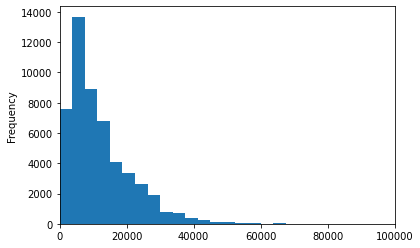

In [205]:
# Histograma de price na df
df['price'].plot(kind='hist',bins = 100, xlim=(0, 100000))

<AxesSubplot:ylabel='Frequency'>

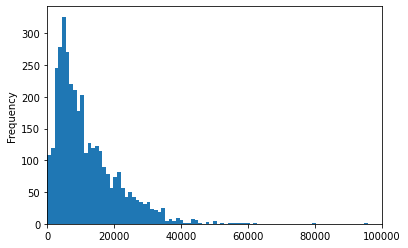

In [206]:
# Histograma de price na df filtrada
df_filtered1['price'].plot(kind='hist',bins = 100, xlim = (0,100000))

<AxesSubplot:>

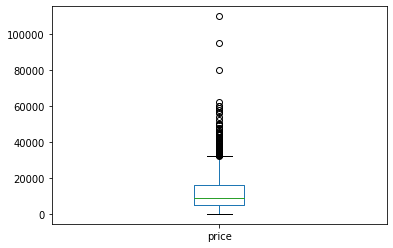

In [207]:
# Boxplot para df
df_filtered1['price'].plot(kind='box')

<AxesSubplot:>

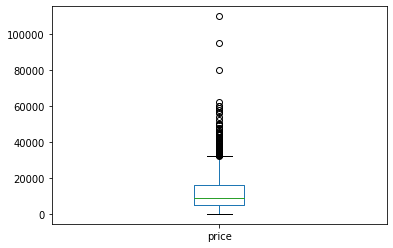

In [208]:
# Boxplot para df filtrada
df_filtered1['price'].plot(kind='box')

In [209]:
# Valores únicos em model_year
df['model_year'].unique()
model_year_missing_list = list(df['model_year'].dropna().unique())
print(model_year_missing_list)

[2011.0, 2013.0, 2003.0, 2017.0, 2014.0, 2015.0, 2012.0, 2008.0, 2018.0, 2009.0, 2010.0, 2007.0, 2004.0, 2005.0, 2001.0, 2006.0, 1966.0, 1994.0, 2019.0, 2000.0, 2016.0, 1993.0, 1999.0, 1997.0, 2002.0, 1981.0, 1995.0, 1996.0, 1975.0, 1998.0, 1985.0, 1977.0, 1987.0, 1974.0, 1990.0, 1992.0, 1991.0, 1972.0, 1967.0, 1988.0, 1969.0, 1989.0, 1978.0, 1965.0, 1979.0, 1968.0, 1986.0, 1980.0, 1964.0, 1963.0, 1984.0, 1982.0, 1973.0, 1970.0, 1955.0, 1971.0, 1976.0, 1983.0, 1954.0, 1962.0, 1948.0, 1960.0, 1908.0, 1961.0, 1936.0, 1949.0, 1958.0, 1929.0]


array([[<AxesSubplot:title={'center':'model_year'}>]], dtype=object)

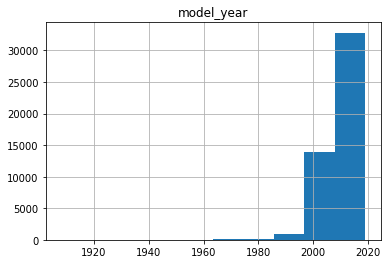

In [210]:
# Histograma de model_year
df.hist('model_year')

**Conclusões iniciais**

Ambas as df não tem distribuição normal dos preços dos carros.

Podemos ver isso pelos gráficos tipo bloxplot onde o máximo superior tem grande relevância em ambos os gráficos e aponta para uma grande presença de outliers, consequentemente desvio padrão alto. Assim não podemos tirar a média.

Poderíamos considerar a mediana e a moda para substituição dos valores que faltam. Neste caso iremos utilizar a moda de preços para cada ano que encontramos em 'model_year_missing_list' e substituir na df.

Faremos isso através da iteração de um loop 'for', gerando os valores de quartil inferior e quartil superior para cada um dos anos, assim iremos fazer com que a substituição do valor ocorra caso:

* price estiver entre quartil inferior e quartil superior para os anos do loop e a coluna estiver com valor nulo.

In [211]:
# Função para substituir valores nulos
for x in model_year_missing_list:
    lowerq = df[df['model_year'] == x]['price'].quantile(0.25)
    upperq = df[df['model_year'] == x]['price'].quantile(0.75)
    if not df[(df['model_year'] == x) & (df['price'] > lowerq) & (df['price'] < upperq)].empty:
        df.loc[(df['model_year'].isnull()) & (df['price'] > lowerq) & (df['price'] < upperq), 'model_year'] = x

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51326 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Nesse código, estamos verificando se existe pelo menos uma linha na DataFrame que corresponde ao ano-modelo atual e tem um preço no intervalo entre o primeiro e o terceiro quartil. Se a verificação for verdadeira, então usamos a função loc[] para substituir o valor ausente do ano-modelo com o valor atual. Caso contrário, não fazemos nada para evitar a imputação de valores imprecisos ou não realistas.

array([[<AxesSubplot:title={'center':'model_year'}>]], dtype=object)

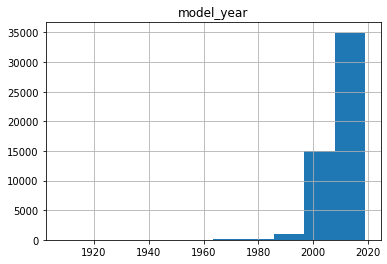

In [212]:
df.hist('model_year')

Nossa DataFrame final tem uma distribuição semelhante ao incial, ou seja, conseguimos adicionar os dados categorizados pela ligação preço x ano sem alterar significamente a distribuição de valores.

Iremos, por final, excluir os dados ausentes que faltaram na coluna model_year que não foram atingidas pelo nosso código. Provavelmente outliers.

In [213]:
df.dropna(subset=['model_year'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51326 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51326 non-null  int64  
 1   model_year    51326 non-null  float64
 2   model         51326 non-null  object 
 3   condition     51326 non-null  object 
 4   cylinders     46090 non-null  float64
 5   fuel          51326 non-null  object 
 6   odometer      43465 non-null  float64
 7   transmission  51326 non-null  object 
 8   type          51326 non-null  object 
 9   paint_color   42098 non-null  object 
 10  is_4wd        25475 non-null  float64
 11  date_posted   51326 non-null  object 
 12  days_listed   51326 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


## Estudo para coluna cylindrers
Iremos estudar a coluna das cilindradas.

Suposição incial: 

Muitos carros não mudam de cilindradas com os anos, ou seja por meio do modelo do carro poderemos descobrir as cilindradas. Iremos checar os valores de distribuição e veracidade de tal afirmação.

Neste caso não iremos, por agora, tratar os dados da coluna 'model', não irá fazer tanta diferença nesse momento.

Iremos gerar uma lista com o nome dos modelos para uso futuro no tratamento de dados.

In [214]:
list_model = list(df['model'].unique())
print(sorted(list_model))

['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se', 'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger', 'ford 

<AxesSubplot:>

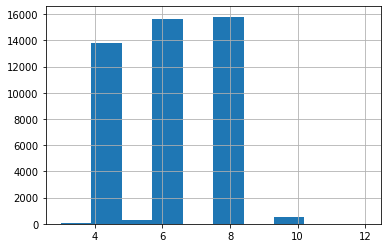

In [215]:
# Histograma de distribuição de cilindradas
df['cylinders'].hist()

Por meio do histograma gerado é possível observar que as cilindradas se comportam de maneira categórica. 

São várias categorias que estão inseridas, dando assim, uma boa base para que nossa ideia de que os carros devam ter as mesmas cilindradas dependendo do modelo.

Vemos, ainda, alguns poucos dados outliers. Menor que 4 cilindros e maior que 8 cilindros. Iremos retirar esses dados de nossa análise, pois dificilmente carros convencionais possuam esta configuração. Além disos o volume não afetará a análise final, pois seu volume é baixo.

In [216]:
# Removendo carros com cilindradas outliers

# Cilindros maior que 8
df = df.drop(df[df['cylinders'] > 8].index)

# Cilindros menor que 4
df = df.drop(df[df['cylinders'] < 4].index)

In [217]:
# Consultando valores únicos em cilindros
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5.])

Agora que limpamos os dados e temos indicios que os dados são categorizados por modelo de carro, iremos utilizar dos modelos de carros para preencher os valores nulos. Como os valores são categorizados e nossa suposição incial tem fortes indícios iremos utilziar da **moda** para substituir os valores ausentes.

Vamos criar um loop 'for' substituindo os valores ausentes pela moda do modelo encontrado em df para o mesmo modelo de carro.

In [218]:
# Loop for para substituição de nulos

for x in list_model:
    moda = df[df['model'] == x]['cylinders'].mode()
    if not moda.empty:
        moda = moda.iloc[0]
        df.loc[(df['model'] == x) & (df['cylinders'].isnull()), 'cylinders'] = moda

In [219]:
# Checando valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50759 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50759 non-null  int64  
 1   model_year    50759 non-null  float64
 2   model         50759 non-null  object 
 3   condition     50759 non-null  object 
 4   cylinders     50759 non-null  float64
 5   fuel          50759 non-null  object 
 6   odometer      42985 non-null  float64
 7   transmission  50759 non-null  object 
 8   type          50759 non-null  object 
 9   paint_color   41635 non-null  object 
 10  is_4wd        25049 non-null  float64
 11  date_posted   50759 non-null  object 
 12  days_listed   50759 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


## Estudo para coluna odometer
Iremos estudar a coluna da kilometragem.

Suposição incial: 

A kilometragem vai depender do ano, é lógico que quanto mais antigo o carro maior tende ser a kilometragem do carro.

Assim, iremos utilizar desta suposição para realizar nossos futuros cálculos.

Iremos analisar a distribuição de valores e histograma para definir um método mais viável para substituição ou não substituição.

De primeira, podemos observar que a quanitdade de valores nulos são significativos para a análise, beirando 16% de nossa última df gerada. Logo será importante acharamos um método para substituição dos valores.

In [220]:
# Imprimindo df
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2017.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Iremos puxar novamente a lista de anos que em 'model_year_missing_list' novamente e analisar os anos tentando categorizar e entender a distribuição tipo histograma e gráfico de dispersão.

In [221]:
# Imprimindo a lista de anos em ordem
print(sorted(model_year_missing_list))

[1908.0, 1929.0, 1936.0, 1948.0, 1949.0, 1954.0, 1955.0, 1958.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0]


<AxesSubplot:ylabel='Frequency'>

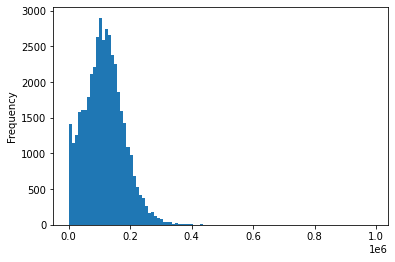

In [222]:
# Vamos gerar histograma de distribuição para kilometragem
df['odometer'].plot(kind='hist', bins =100)

<AxesSubplot:xlabel='model_year', ylabel='odometer'>

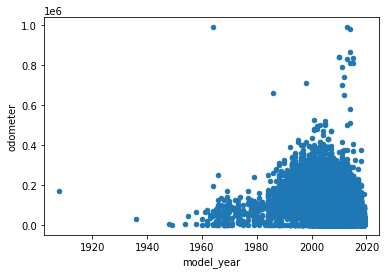

In [223]:
# Usando o método plot.scatter() para criar o gráfico de dispersão
df.plot.scatter(x='model_year', y='odometer')

Pelo gráfico de dispersão gerado podemos observar que ao crescer os anos temos uma tendência do crescimento do desvio padrão dos dados. 

Outro ponto interessante de observação são os outliers após os anos 2000, em específico entre 2010 e 2020. Existem carros com mais de 500000km rodados. Iremos por via de regra retirar esses dados de nossa DataFrame, pois a representatividade é baixa e teremos menor discrepância de dados para substituições futuras.

In [224]:
# retirando dados de odometer > 500000
df = df.drop(df[df['odometer'] >= 500000].index)

<AxesSubplot:xlabel='model_year', ylabel='odometer'>

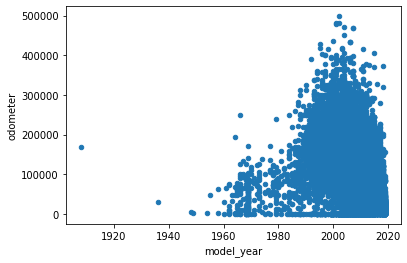

In [225]:
# Usando o método plot.scatter() para criar o gráfico de dispersão e nova análise
df.plot.scatter(x='model_year', y='odometer')

**Conclusão intermediária**

Sabemos antes dos anos 1990 os dados não possuem um âmbito de erro tão grande quanto após isso. É evidente por meio do último gráfico de dispersão gerado que o erro vai aumentando conforme o passar dos anos, pois há uma maior distribuição nos dados de 'odometer'.

Além disso, realizamos a retirada de alguns outliers da análise, pois pareciam estar inseridos de maneira erronêa e poderiam afetar a análise final. Tinhamos carros, de certa maneira novos, com mais de 500000km.

Para substituição dos valores é interessante que a gente faça iteração sobre os anos da tabela e realize a substituição. 

Vamos analisar a distribuição dos anos 1990 em diante e realizar uma decisão acerca da metodologia de substituição dos valores que iremos utilizar. Também iremos realizar a mesma análise antes dos anos 1990 para decisão da metodologia.

Ou seja, iremos categorizar em dois grupos A(<1990) B(>1990).

<AxesSubplot:ylabel='Frequency'>

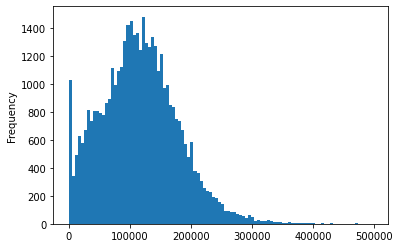

In [226]:
# Categorização e histogramas

dfA = df[df['model_year'] >= 1990]
dfB = df[df['model_year'] < 1990]

# Histograma para dfA
dfA['odometer'].plot(kind='hist', bins =100)

<AxesSubplot:ylabel='Frequency'>

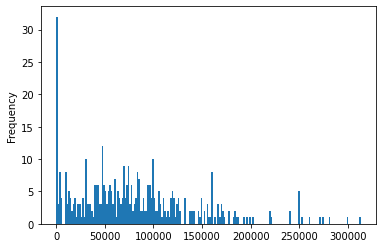

In [227]:
# Histograma para dfB
dfB['odometer'].plot(kind='hist', bins =200)

Podemos observar que tem-se muitos carros com 0km, tanto para depois de 1990 quanto para antes de 1990. Para antes de 1990 é um dado muito estranho e tem-se poucos valores não afetando muito a df final, assim iremos retirar estes valores da df.

Para após 1990 iremos analisar os dados de anos em que a contenham odometer igual a 0.

In [228]:
# Removendo dados em que odometer igual a 0 e model_year menor que 1990
df = df.drop(df[(df['odometer'] ==0) & (df['model_year'] < 1990)].index)

In [229]:
# Analisando dados em que odometer igual 0 e model_year maior que 1990
print(dfA[dfA['odometer']==0]['model_year'].unique())
print(dfA[dfA['odometer']==0]['model_year'].count())

[2009. 1999. 2003. 1992. 2000. 2010. 2006. 1995. 2011. 2013. 2007. 1994.
 2002. 2018. 2008. 2001. 2004. 1996. 1991. 2016. 2014. 2015. 2012. 2017.
 2005.]
172


Agora iremos retirar todos os dados em que odometer igual a 0, pois sabemos que a quantidade de dados é baixa e que, provavalemnte, foi dado o input errado na kilometragem.

Pode-se observar, pois os anos dos carros não são do último ano de contagem em model_year.

In [230]:
# Retirando dados em que odometer igual a 0
df = df.drop(df[df['odometer'] == 0].index)

**Conclusão Intermediária**

Como vimos, retiramos os valores em que odometer era igual a zero, pois além de poucos dados, também pareciam ter sido dado input de maneira errada. Retiramos os outliers da análise, por parecerem errados da mesma maneira.

Os histogramas gerados para os grupos (antes de 1990 / depois 1990) mostram duas distribuições diferentes. O grupo antes de 1990 vamos substituir pela mediana, pois aparenta ser uma distribuição não normal de dados. 

Já o grupo após 1990, nos aparenta ter a distribuição normal, visto no histograma. Assim, vamos decidir por utilizar a média para realizar a substituição dos valores.

Iremos utilizar a função loc[] para realizar a substituição. Para melhorar a distribuição dos valores e tentar ser mais assertivo, iremos, ainda, utilizar um loop tipo 'for' tirando a média por ano e inserindo na df. Como temos um grande número de valores, quanto mais acertivo o método melhor.

In [231]:
# calculando os parametos para mediana<1990
mediana_antes_1990 = df[df['model_year'] < 1990]['odometer'].median()

# substituindo valores para antes de 1990
df.loc[(df['model_year'] < 1990) & (df['odometer'].isnull()), 'odometer'] = mediana_antes_1990

In [232]:
# calculos para após de 1990

# criando lista de anos
anos = [ano for ano in range(1990, 2024)]

# loop for e calculos para substituição
for x in anos:
    media = df[df['model_year'] == x]['odometer'].mean()
    if not np.isnan(media):
        df.loc[(df['model_year'] == x) & (df['odometer'].isnull()), 'odometer'] = media

In [233]:
# check se funcionou corretamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50552 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50552 non-null  int64  
 1   model_year    50552 non-null  float64
 2   model         50552 non-null  object 
 3   condition     50552 non-null  object 
 4   cylinders     50552 non-null  float64
 5   fuel          50552 non-null  object 
 6   odometer      50552 non-null  float64
 7   transmission  50552 non-null  object 
 8   type          50552 non-null  object 
 9   paint_color   41460 non-null  object 
 10  is_4wd        24987 non-null  float64
 11  date_posted   50552 non-null  object 
 12  days_listed   50552 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


<AxesSubplot:xlabel='model_year', ylabel='odometer'>

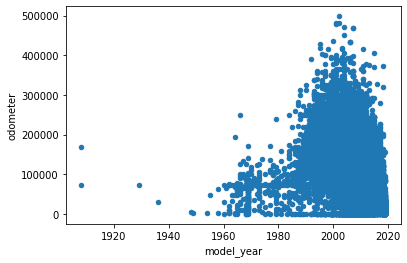

In [234]:
# check no nova distribuição gerada
df.plot.scatter(x='model_year', y='odometer')

**Conclusão Final**

Como podemos ver a substituição de odometer não foi tão simples. Foi necessário a categorização entre dois grupos que puderam ser vistos mediante a geração do gráfico de distribuição.

Além disso, tivemos valores que não condiziam com uma realidade lógica, como valores muito discrepantes de kilometragem para carros mais novos e valores de kilometagem de carros 0km para modelos muito antigos.

Foi feita a retirada desses dados afim de melhorar a análise e foram feita as analises de histograma para os grupos gerados. Foi possível observar que havia um crescimento de comportamento de distribuiçãoi ao crescer os anos, assim dividiu-se a dataframe em duas sendo:

* model_year antes de 1990
* model_year depois de 1990

Gerou-se o gráfico de histograma para os dois casos e decidiu-se utilizar a mediana para o caso <1990 e média para >1990.

## Estudo para coluna paint_color
Iremos estudar a cor dos carros.

Analisando as informações gerais da dataframe, sabemos que esta coluna tem um grande número de valores nulos sendo, aproximadamente, 18% da última df gerada. Essa valor é muito grande e poderia afetar em nossa análise final. Desta maneira deveriamos realizar análises e testes para encontrar algum parametro para substituição.

Vamos realizar uma análise de distribuição pro categoria de cor para entender como funciona.

Em minha visão o dado acerca da cor do carro é muito subjetivo e, obviamente, teria uma tendência, porém, novamente, é muito subjetiva. Talvez errariamos ao inserir novos dados.

Se não encontrarmos um padrão e um valor na distribuição não iremos retirar os dados e substituir como 'unknown' para efeitos futuros.

In [235]:
# mostrando a df
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2017.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,156951.233843,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,NaN,2018-07-02,71


In [236]:
# valores únicos em paint_color
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

<BarContainer object of 12 artists>

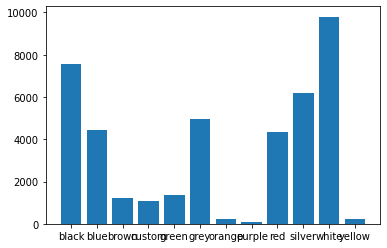

In [237]:
# distribuição de contagem de cores por cor
grupos = df.groupby(by='paint_color')['paint_color'].count()
plt.bar(grupos.index, grupos)

**Conclusão intermediária**

Podemos observar que não há nenhum valor de cor discrepante e há vários grupos com valores altos. 

Os valores de preto, branco e prata sobressaem o restante dos valores, além disso, vermelho, azul e verde também tem boa representatividade.

Vamos agora realizar uma análise por nome de carro para entender se há alguma diferença ou correlação para as marcas ou se seguem o mesmo padrão da df total. 

Caso siga o mesmo padrão da df, não poderemos realizar a troca de valores.

In [238]:
# lista de nomes de carros
print(list_model)

['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200', 'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento', 'chevrolet silverado 1500', 'honda accord', 'ram 1500', 'gmc yukon', 'jeep cherokee', 'chevrolet traverse', 'hyundai elantra', 'chevrolet tahoe', 'toyota rav4', 'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu', 'ford fusion se', 'chevrolet impala', 'chevrolet corvette', 'jeep liberty', 'toyota camry le', 'nissan altima', 'subaru outback', 'toyota highlander', 'dodge charger', 'toyota tacoma', 'chevrolet equinox', 'nissan rogue', 'mercedes-benz benze sprinter 2500', 'honda cr-v', 'jeep grand cherokee', 'toyota 4runner', 'ford focus', 'honda civic', 'kia soul', 'chevrolet colorado', 'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d', 'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd', 'nissan frontier crew cab sv', 'subaru impreza', 'jeep grand cherokee laredo', 'nissan versa', 'ford f-250 sd', 'chevrolet silverado 1500 crew', 'ford f2

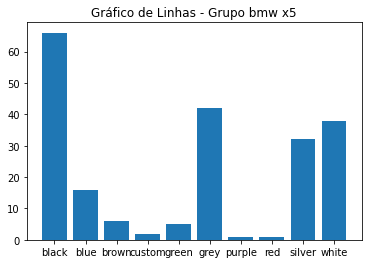

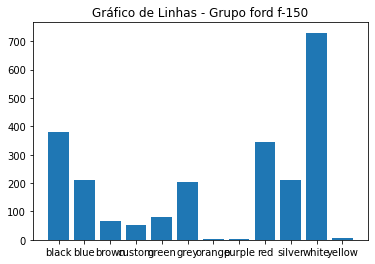

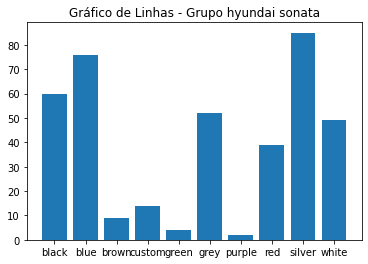

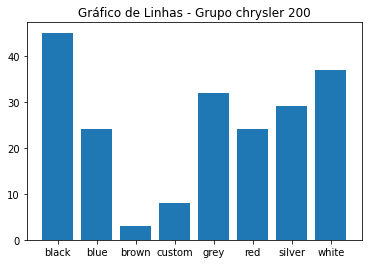

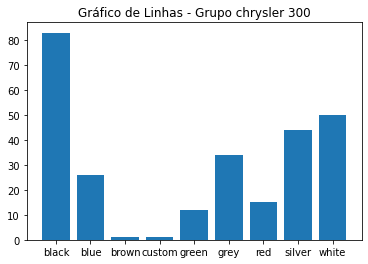

In [239]:
# vamos gerar 5 gráficos para diferentes carros e analisar a distribuição
for x in range (0,5):
    y = list_model[x]
    grupos = df[df['model'] == y].groupby(by='paint_color')['paint_color'].count()
    plt.figure()
    plt.title(f'Gráfico de Linhas - Grupo {y}')
    plt.bar(grupos.index, grupos)

**Conclusão Final**

Primeiramente, os dados de coloração dos carros é um dado de aleatoriedade muito alta. Ou seja, diferentes carros tem diferentes cores para diferentes modelos. Isso gera uma aleatoriedade tão grande que deixa quase impossível a substituição dos valores ausentes.

Além disso, quando geramos os gráficos de distribuição das cores pelos modelos, podemos ver que há várias cores que sobressaem na contagem geral de cores, dificultando ainda mais a substituição.

Ao analisar o conjunto de dados utilizando 5 marcas de carros diferentes, nos deparamos com a aleatoriedade referida. Ou seja, cada modelo de carro tem sua própria característica e, na maior parte das vezes, bem distribuídas. Isso é, diferentes carros tem diferentes comportamentos de cor e sem cores que se sobressaem.

Nesse cenário, se alterarmos a grande quantidade de dado que a coluna está faltando iremos afetar negativamente a análise final, pois iriamos apagar outras linhas da df que não estão vazias e que iremos utilizar para análise. Assim, iremos deixar os dados e substituir os dados nulos pela string 'unknown'.

In [240]:
# substituindo valores ausentes por unkwnown
df['paint_color'] = df['paint_color'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50552 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50552 non-null  int64  
 1   model_year    50552 non-null  float64
 2   model         50552 non-null  object 
 3   condition     50552 non-null  object 
 4   cylinders     50552 non-null  float64
 5   fuel          50552 non-null  object 
 6   odometer      50552 non-null  float64
 7   transmission  50552 non-null  object 
 8   type          50552 non-null  object 
 9   paint_color   50552 non-null  object 
 10  is_4wd        24987 non-null  float64
 11  date_posted   50552 non-null  object 
 12  days_listed   50552 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


## Estudo para coluna is_4wd
Iremos estudar o veículo 4x4.

A nossa df retorna que há vários valores nulos, mas pelo padrão da DataFrame e pelo modelo que a index da coluna veio podemos supor que 1 é igual a 'Sim' é 4x4 e 0 é 'Não' é 4x4.

Assim seria interessante substituir os valores nulos pelo número 0, ou trabalhar com True e False como Bool.

Vamos analisar os valores únicos na coluna e depois decidir pela troca ou não.

In [241]:
# valores únicos is_4wd
df['is_4wd'].unique()

array([ 1., nan])

Pelo que parece a coluna nossa suposição parece correta mesmo. Iremos realizar a substituição de nulos por 0

In [242]:
# substituindo valor
df['is_4wd'] = df['is_4wd'].fillna(False)

# de float para int
df['is_4wd'] = df['is_4wd'].astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50552 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50552 non-null  int64  
 1   model_year    50552 non-null  float64
 2   model         50552 non-null  object 
 3   condition     50552 non-null  object 
 4   cylinders     50552 non-null  float64
 5   fuel          50552 non-null  object 
 6   odometer      50552 non-null  float64
 7   transmission  50552 non-null  object 
 8   type          50552 non-null  object 
 9   paint_color   50552 non-null  object 
 10  is_4wd        50552 non-null  int64  
 11  date_posted   50552 non-null  object 
 12  days_listed   50552 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.4+ MB


In [243]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2017.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,156951.233843,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71


## Corrija os tipos de dados

Agora iremos corrigir os tipos de dados que as colunas estão classificadas.

Nas primeiras seções já havíamos comentado um pouco dos erros dos dados das colunas.

Iremos chamar a função .info e imprimir a DataFrame para recordar os erros e substituir os tipos de dados em poucos comandos.

In [244]:
# informações sobre as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50552 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50552 non-null  int64  
 1   model_year    50552 non-null  float64
 2   model         50552 non-null  object 
 3   condition     50552 non-null  object 
 4   cylinders     50552 non-null  float64
 5   fuel          50552 non-null  object 
 6   odometer      50552 non-null  float64
 7   transmission  50552 non-null  object 
 8   type          50552 non-null  object 
 9   paint_color   50552 non-null  object 
 10  is_4wd        50552 non-null  int64  
 11  date_posted   50552 non-null  object 
 12  days_listed   50552 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.4+ MB


In [245]:
# imprimindo df
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2017.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,156951.233843,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71


**Conclusão Intermediária**

As colunas que necessitamos alterar os dados são:

* model_year --> float to int
* model --> substituir duplicatas implicitas
* condition --> verificar por duplicatas implicitas
* cylinders --> float to int
* odometer --> float to int
* transmission --> verificar por duplicatas implicitas
* type --> verificar por duplicatas implicitas
* date_posted --> object to dtime

Vamos começar com as substituições de float para int inicialmente e depois iremos a procura de duplicatas implicitas em outras colunas.

### Float para int e object para dtime

In [246]:
# trocando os tipos de float para int nas colunas
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['odometer'] = df['odometer'].astype(int)

# trocando object to dtime
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [247]:
# check nos dados para analisar modificações
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50552 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50552 non-null  int64         
 1   model_year    50552 non-null  int64         
 2   model         50552 non-null  object        
 3   condition     50552 non-null  object        
 4   cylinders     50552 non-null  int64         
 5   fuel          50552 non-null  object        
 6   odometer      50552 non-null  int64         
 7   transmission  50552 non-null  object        
 8   type          50552 non-null  object        
 9   paint_color   50552 non-null  object        
 10  is_4wd        50552 non-null  int64         
 11  date_posted   50552 non-null  datetime64[ns]
 12  days_listed   50552 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.4+ MB


### Análise de colunas com possíveis duplicatas implícitas

Iremos analisar se as colunas de strings contem duplicatas implicitas e substitui-las discutindo acerca e explicando o porquê da substituição.

**Coluna Model**

Iremos começar a analise para coluna Model. Iremos gerar uma lista de dados de modelos únicos encontrados e substituir caso for pertinente.

A lista será em ordem alfabética.

Anteriormente já havíamos feito esta lista, iremos imprimir e analisar a mesma

In [248]:
# imprimindo em ordem
print(sorted(list_model))

['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se', 'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger', 'ford 

Observamos duplicatas implicitas para os modelos da Ford F-250 e F-350 em que SD e Super Duty são as mesmas conotações, além disso F-250 tem de duas maneiras, uma sem hífen e outra com. Assim iremos retirar primeiramente o hífen e depois substituir as duplicatas que contem SuperDuty por SD.

Seguem grupos implicitos:

* 'ford f-250 sd', 'ford f-250 super duty',''ford f250 super duty'
*  'ford f-250’, ford f250', 
* ford f-350 sd, ford f350 super duty',
* ford f-150 , ford f150

In [249]:
# trocando os valores de ford duplicados
df['model'] = df['model'].replace('ford f-250 super duty', 'ford f-250 sd')
df['model'] = df['model'].replace('ford f250 super duty', 'ford f-250 sd')

df['model'] = df['model'].replace('ford f-250', 'ford f250')

df['model'] = df['model'].replace('ford f350 super duty', 'ford f-350 sd')

df['model'] = df['model'].replace('ford f-150', 'ford f150')

In [250]:
# Print dos dados para analisar
new_list_model = list(df['model'].unique())
print(sorted(new_list_model))

['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-250 sd', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f350', 'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se', 'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger', 'ford taurus', 'gmc acadia', 'gmc sierra', 'gmc sierra 1500', 'gmc sierra 2500hd', 'gmc yukon', 'honda acco

Agora removemos as duplicatas implicitas da coluna 'model'.

**Coluna condition**

 Iremos gerar uma lista de dados de modelos únicos encontrados e substituir caso for pertinente.

A lista será em ordem alfabética.

Vamos gerar  e analisar.

In [251]:
# gerando lista de únicos em condition
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

Todos os dados parecem estar OK, iremos manter no mesmo modelo.

**Coluna transmission**

 Iremos gerar uma lista de dados de modelos únicos encontrados e substituir caso for pertinente.

A lista será em ordem alfabética.

Vamos gerar  e analisar.

In [252]:
df['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

Parece estar tudo OK, vamos seguir e manter o mesmo modelo.

**Coluna type**

Iremos gerar uma lista de dados de modelos únicos encontrados e substituir caso for pertinente.

A lista será em ordem alfabética.

Vamos gerar  e analisar.

In [253]:
df['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

Vamos criar uma df com os valores somente para truck , uma somente para pickup e uma somente para offroad e analisar os carros para ver se há correlação de tipos de carro.

In [254]:
# tipo truck
df[df['type'] == 'truck']['model'].unique()

array(['chevrolet silverado', 'ford f150', 'chevrolet colorado',
       'ram 1500', 'chevrolet silverado 1500',
       'chevrolet silverado 3500hd', 'ford f-250 sd', 'ford f-350 sd',
       'ford f250', 'ford ranger', 'gmc sierra', 'toyota tacoma',
       'gmc sierra 2500hd', 'gmc sierra 1500', 'toyota tundra',
       'ram 3500', 'ram 2500', 'nissan frontier',
       'chevrolet silverado 2500hd', 'jeep wrangler', 'dodge dakota',
       'ford explorer', 'ford f350', 'chevrolet suburban',
       'ford econoline', 'gmc yukon', 'chevrolet tahoe', 'nissan maxima',
       'jeep grand cherokee laredo', 'ford f150 supercrew cab xlt',
       'chevrolet silverado 1500 crew', 'cadillac escalade',
       'buick enclave', 'jeep liberty', 'ford escape',
       'jeep grand cherokee', 'jeep cherokee', 'toyota corolla',
       'nissan frontier crew cab sv', 'ford fusion se', 'honda accord',
       'toyota rav4', 'chevrolet malibu', 'ford expedition',
       'toyota 4runner', 'toyota camry', 'nissan alt

In [255]:
# tipo pickup
df[df['type'] == 'pickup']['model'].unique()

array(['ford f150', 'chevrolet silverado 1500', 'ram 1500',
       'toyota tacoma', 'ford f150 supercrew cab xlt',
       'nissan frontier crew cab sv', 'chevrolet silverado 1500 crew',
       'ford f-250 sd', 'chevrolet colorado', 'chevrolet silverado',
       'ford ranger', 'ford f250', 'gmc sierra 2500hd', 'ram 2500',
       'nissan frontier', 'gmc sierra 1500', 'ram 3500',
       'chevrolet silverado 2500hd', 'gmc sierra', 'cadillac escalade',
       'ford f-350 sd', 'ford f350', 'chevrolet silverado 3500hd',
       'toyota tundra', 'dodge dakota', 'toyota prius', 'toyota sienna',
       'ford explorer', 'jeep wrangler', 'toyota corolla',
       'chevrolet trailblazer', 'kia soul', 'toyota 4runner',
       'ford fusion se', 'nissan murano', 'toyota rav4'], dtype=object)

In [256]:
# tipo offroad
df[df['type']=='offroad']['model'].unique()

array(['jeep wrangler', 'toyota tacoma', 'jeep wrangler unlimited',
       'ford f150', 'jeep cherokee', 'jeep grand cherokee',
       'jeep liberty', 'toyota 4runner', 'chevrolet silverado 1500',
       'gmc sierra', 'chevrolet tahoe', 'ford ranger',
       'chevrolet silverado 2500hd', 'chevrolet silverado',
       'gmc sierra 1500', 'dodge grand caravan', 'toyota tundra',
       'chevrolet suburban', 'honda cr-v', 'ram 1500', 'nissan frontier',
       'honda odyssey'], dtype=object)

Como podemos observar há carros de modelos iguais em tipos de categorias diferentes, isso afetaria nossa analise final. Assim iremos categorizar todos como somente 'truck'.

In [257]:
# substituindo

df['type'] = df['type'].replace('offroad', 'truck')
df['type'] = df['type'].replace('pickup', 'truck')

df['type'].unique()

array(['SUV', 'truck', 'sedan', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'bus'], dtype=object)

## Enriqueça os dados

Agora iremos enriquecer os dados de nossa análise categorizando os dados e criando novas colunas com dados específicos.

Faremos as seguintes adições e categorizações:

* 		Dia da semana, mês, e ano que a propaganda foi colocada
* 		A idade do veículo (em anos) quando a propaganda foi colocada
* 		A média de quilometragem por ano

Na coluna condition, substituir valores de string por uma escala numérica:
* 		novo = 5
* 		como novo = 4
* 		excellente = 3
* 		bom = 2
* 		razoável = 1
* 		sucata = 0

In [258]:
# Adicione valores data/hora para quando a propaganda estiver colocada
df['dia_semana'] = df['date_posted'].dt.day_name()  # cria uma nova coluna com o dia da semana
df['mes'] = df['date_posted'].dt.month  # cria uma nova coluna com o mês
df['ano'] = df['date_posted'].dt.year  # cria uma nova coluna com o ano

# mostrando df
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana,mes,ano
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,Saturday,6,2018
1,25500,2017,ford f150,good,6,gas,88705,automatic,truck,white,1,2018-10-19,50,Friday,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019
3,1500,2003,ford f150,fair,8,gas,156951,automatic,truck,unknown,0,2019-03-22,9,Friday,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,Wednesday,10,2018
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,Wednesday,11,2018
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,Thursday,11,2018
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,Monday,7,2018


In [259]:
# Adicione a idade do veículo quando a propaganda for colocada
df['idade_carro'] = df['ano'] - df['model_year']

# mostrando df
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana,mes,ano,idade_carro
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,Saturday,6,2018,7
1,25500,2017,ford f150,good,6,gas,88705,automatic,truck,white,1,2018-10-19,50,Friday,10,2018,1
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,6
3,1500,2003,ford f150,fair,8,gas,156951,automatic,truck,unknown,0,2019-03-22,9,Friday,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,Wednesday,10,2018,5
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,Wednesday,11,2018,16
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,Thursday,11,2018,9
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,Monday,7,2018,5


In [260]:
# Adicione a quilometragem média por ano
if (df['idade_carro'] == 0).any():
    df['quilometragem_media'] = df['odometer']
else:
    df['quilometragem_media'] = df['odometer']/df['idade_carro']
    
# mostrando df
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana,mes,ano,idade_carro,quilometragem_media
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,Saturday,6,2018,7,145000
1,25500,2017,ford f150,good,6,gas,88705,automatic,truck,white,1,2018-10-19,50,Friday,10,2018,1,88705
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,6,110000
3,1500,2003,ford f150,fair,8,gas,156951,automatic,truck,unknown,0,2019-03-22,9,Friday,3,2019,16,156951
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,2,80903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,Wednesday,10,2018,5,88136
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,Wednesday,11,2018,16,181500
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,Thursday,11,2018,9,128000
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,Monday,7,2018,5,139573


In [261]:
# Vamos criar uma coluna para condition numérica.

# criar um dicionário com a correspondência entre as strings e as escalas numéricas
mapa_condicao = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}

# usar a função replace para substituir as strings pelos valores numéricos correspondentes
df['condition_rate'] = df['condition'].replace(mapa_condicao)

# imprimindo df
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana,mes,ano,idade_carro,quilometragem_media,condition_rate
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,Saturday,6,2018,7,145000,2
1,25500,2017,ford f150,good,6,gas,88705,automatic,truck,white,1,2018-10-19,50,Friday,10,2018,1,88705,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,6,110000,4
3,1500,2003,ford f150,fair,8,gas,156951,automatic,truck,unknown,0,2019-03-22,9,Friday,3,2019,16,156951,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,2,80903,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,Wednesday,10,2018,5,88136,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,Wednesday,11,2018,16,181500,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,Thursday,11,2018,9,128000,3
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,Monday,7,2018,5,139573,2


## Verifique os dados limpos

Nossos dados estão prontos para análise, agora vamos dar um check rápido para visualizar se está tudo correto. 

In [262]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50552 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                50552 non-null  int64         
 1   model_year           50552 non-null  int64         
 2   model                50552 non-null  object        
 3   condition            50552 non-null  object        
 4   cylinders            50552 non-null  int64         
 5   fuel                 50552 non-null  object        
 6   odometer             50552 non-null  int64         
 7   transmission         50552 non-null  object        
 8   type                 50552 non-null  object        
 9   paint_color          50552 non-null  object        
 10  is_4wd               50552 non-null  int64         
 11  date_posted          50552 non-null  datetime64[ns]
 12  days_listed          50552 non-null  int64         
 13  dia_semana           50552 non-

In [263]:
# imprima uma amostragem dos dados
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana,mes,ano,idade_carro,quilometragem_media,condition_rate
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,Saturday,6,2018,7,145000,2
1,25500,2017,ford f150,good,6,gas,88705,automatic,truck,white,1,2018-10-19,50,Friday,10,2018,1,88705,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,6,110000,4
3,1500,2003,ford f150,fair,8,gas,156951,automatic,truck,unknown,0,2019-03-22,9,Friday,3,2019,16,156951,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,2,80903,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,Wednesday,6,2018,4,57954,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,Thursday,12,2018,3,79212,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,Monday,1,2019,6,109473,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19,Monday,7,2018,6,104174,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,Friday,2,2019,11,147191,3


In [264]:
df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana,mes,ano,idade_carro,quilometragem_media,condition_rate
51515,12000,2005,chevrolet silverado 2500hd,good,8,diesel,228000,automatic,truck,silver,1,2018-08-18,52,Saturday,8,2018,13,228000,2
51516,8999,2011,jeep grand cherokee,good,6,gas,123184,automatic,SUV,white,1,2018-11-01,51,Thursday,11,2018,7,123184,2
51517,11000,2012,dodge charger,excellent,8,gas,81000,automatic,sedan,black,0,2019-04-19,44,Friday,4,2019,7,81000,3
51518,3750,2005,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,0,2018-08-10,63,Friday,8,2018,13,110200,3
51519,11750,2015,honda accord,excellent,4,gas,82644,automatic,coupe,unknown,0,2018-11-24,89,Saturday,11,2018,3,82644,3
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,Wednesday,10,2018,5,88136,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,Wednesday,11,2018,16,181500,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,Thursday,11,2018,9,128000,3
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,Monday,7,2018,5,139573,2
51524,6300,2014,nissan altima,good,4,gas,93017,automatic,sedan,unknown,0,2018-06-05,10,Tuesday,6,2018,4,93017,2


## Estude os parâmetros fundamentais

Iremos estudar os paramêtros fundamentais para as nossas análises. Iremos analisar os valores atípicos dos dados para cada uma das colunas escolhidas.

Iremos utilizar do método do boxplot para plotar gráficos em que possamos ver os valores que estão fora do range dos máximos e mínimos. 

Também será gerado um histograma antes e depois para analise do comportamento.

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição


Inicialmente iremos criar duas funções. Uma para gerar histogramas e a outra para gerar o bloxplot.

Outra função criada será para cálculo de bigode superior e inferior do bloxpot gerado, assim poderemos filtrar os dados posteriormente e analisar. Iremos armazenar os dados fora dos limites em uma outra dataframe e comparar os gráficos gerados

In [265]:
# Criando funções

# Criando função histograma
def hist(df,column, bins):
    return df[column].plot(bins=bins, kind = 'hist').set_xlim(0,df[column].max())

# Criando função boxplot
def box(df,column):
    return df[column].plot(kind='box')

# calculador de bigode
def calcula_bigode(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

(-12850.0, 34750.0)

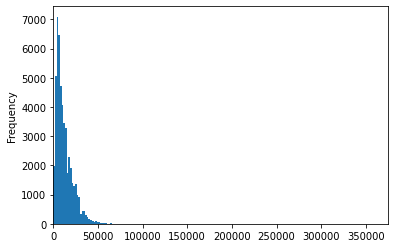

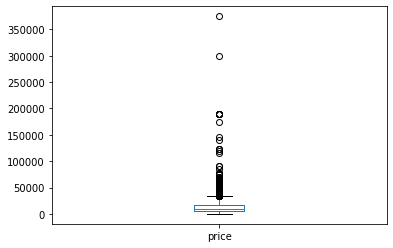

In [266]:
# analise para 'price'

hist(df,'price', 200)
plt.figure()
box(df,'price')
calcula_bigode(df,'price')

(-8.0, 24.0)

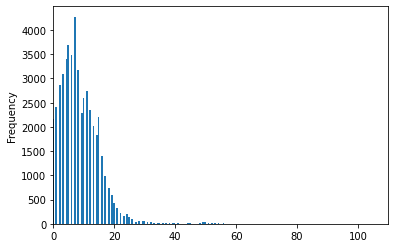

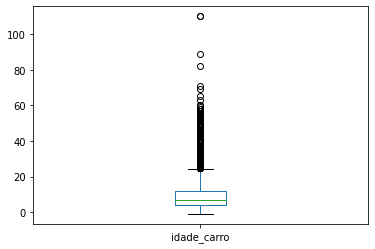

In [267]:
# analise para 'idade_carro'

hist(df,'idade_carro', 200)
plt.figure()
box(df,'idade_carro')
calcula_bigode(df,'idade_carro')

(-43454.25, 270023.75)

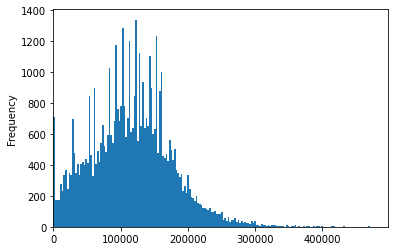

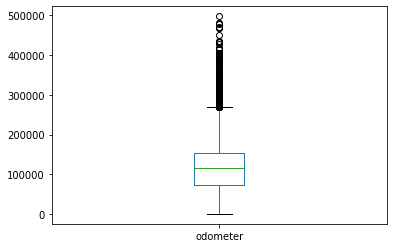

In [268]:
# analise para 'odometer'

hist(df,'odometer', 200)
plt.figure()
box(df,'odometer')
calcula_bigode(df,'odometer')

(-2.0, 14.0)

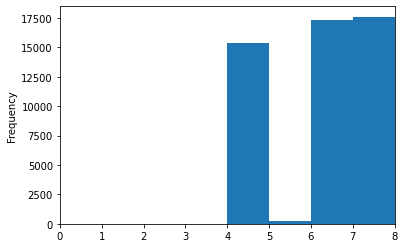

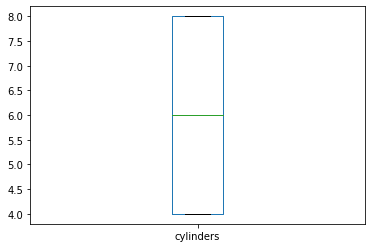

In [269]:
# analise para 'cylinders'

hist(df,'cylinders', 4)
plt.figure()
box(df,'cylinders')
calcula_bigode(df,'cylinders')

(0.5, 4.5)

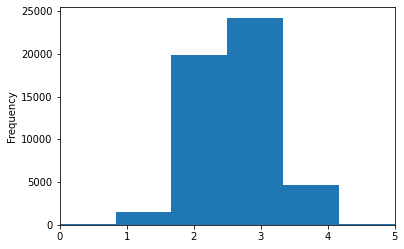

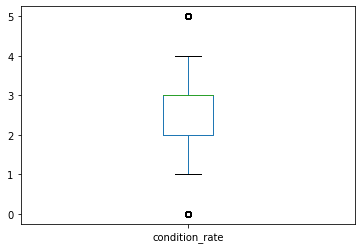

In [270]:
# analise para 'condition_rate'

hist(df,'condition_rate', 6)
plt.figure()
box(df,'condition_rate')
calcula_bigode(df,'condition_rate')

## Estude e cuide dos valores atípicos

Os limites superiores e inferiores já foram definidos e estão no topo de cada um dos gráficos gerados. Iremos utilizar a função query para gerar uma nova df sem os valores atípicos.

A coluna cylinders já havíamos trabalhado na parte de limpeza e tratamento de dados, logo não necessita de tratamento para os valores atípicos.

In [271]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
newdf = df.query("(-12850 <= price <= 34750) and (-8 <= idade_carro <= 24) and (-43435.5 <= odometer <= 270064.5) and (-0.5 <= condition_rate <= 4.5)")
newdf

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana,mes,ano,idade_carro,quilometragem_media,condition_rate
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,Saturday,6,2018,7,145000,2
1,25500,2017,ford f150,good,6,gas,88705,automatic,truck,white,1,2018-10-19,50,Friday,10,2018,1,88705,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,6,110000,4
3,1500,2003,ford f150,fair,8,gas,156951,automatic,truck,unknown,0,2019-03-22,9,Friday,3,2019,16,156951,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,2,80903,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,Wednesday,10,2018,5,88136,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,Wednesday,11,2018,16,181500,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,Thursday,11,2018,9,128000,3
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,Monday,7,2018,5,139573,2


## Estude os parâmetros fundamentais sem valores atípicos


Iremos usar os dados filtrados para gerar novos graficos e comparar coms os valores anteriores.

<Figure size 432x288 with 0 Axes>

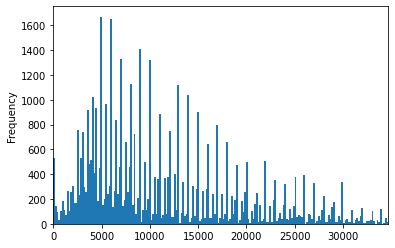

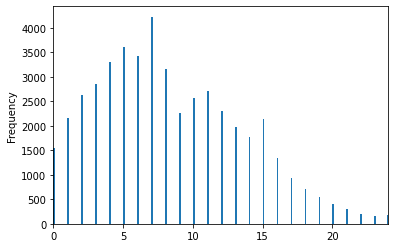

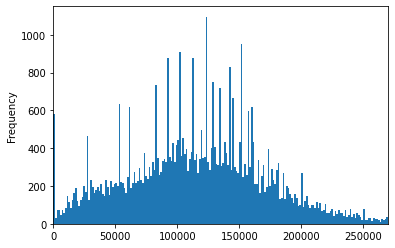

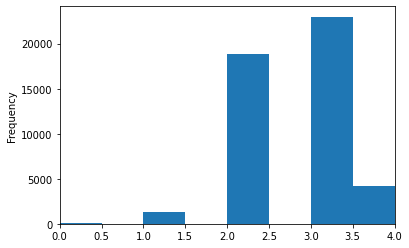

<Figure size 432x288 with 0 Axes>

In [272]:
# histograma filtrado price
hist(newdf,'price', 200)
plt.figure()

# histograma filtrado idade_carro
hist(newdf,'idade_carro', 200)
plt.figure()

# histograma filtrado odometer
hist(newdf,'odometer', 200)
plt.figure()

# histograma filtrado condition_rate
hist(newdf,'condition_rate', 8)
plt.figure()

**Conclusão final**

Comparação de histogramas:

1) Price --> Podemos observar que com a mudança para a df filtrada tivemos uma maior padronização da Dataframe, a curva de distribuição nos parece mais de maneira normalizada. Os valores discrepantes sumiram e os valores nos parecem mais perto da média do que antes. Agora pode-se observar melhor que a concentração de preços de carros é de 0-5000 dolares.

2) Idade do carro --> As diferenças entre os histogramas são claros e podemos observar que no gráfico filtrado temos uma gráfico mais bem distribuido, dando sinais de normalidade ao gráfico. Ou seja, a parte extrema a direita do gráfico com os valores discrepantes sumiram e a curva de dados ficou mais 'suave'. O histograma filtrado se mostra melhor do que o original e os valores estão mais perto da média agora.

3) Quilometragem --> A diferença entre os dois gráficos é clara, os valores no histograma filtrado é distribuição normal, ou seja, o gráfico de dados faz uma espécie de onda. Há alguns 'spikes' de valores, talvez devido as nossas substituições anteriores em alguns valores de contagem. Pode-se observar que há um desvio padrão menor no gráfico filtrado do que no gráfico orginal, onde os valores não se distanciam tanto da média.

4) Cilindros --> O gráfico de cilindros não geramos, pois já havíamos tratado anteriormente os dados discrepantes. Logo deixamos fora de nossa análise.

5) Condição --> Vimos que para as condições ao filtrar para os valores discrepantes tivemos um comportamento ao contrário dos filtros da outra coluna, sendo que o gráfico de distribuição, aparentemente normal, foi para uma distribuição não normal ficando a direita do gráfico. Talvez aumentando a escala de x teríamos outra visão, porém parece que o gráfico de distribuição tipo histograma piorou um pouco neste quesito.

## Tempo de vida das propagandas

Vamos estudar o tempo de vida das propagandas e anúncios dos carros.

Iremos calcular a média e mediana, descever o tempo de vida útil comum. Também iremos analisar valores incomuns para o tempo de vida da propaganda. Iremos fazer isso utilizando o mesmo método anterior de calculo de valores atípicos com histograma.

O tempo de vida útil comum podemos descrever por meio da moda, ou seja, qual o valor que mais aparece para a coluna days_listed.

A média é 39.5442715461877 dias
A mediana é 33.0 dias
A moda é 18 dias


(0.0, 271.0)

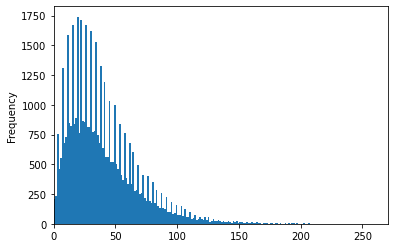

In [273]:
# calculando média 
mediadl = newdf['days_listed'].mean()
print(f'A média é {mediadl} dias')

# calculando mediana
medianadl = newdf['days_listed'].median()
print(f'A mediana é {medianadl} dias')

# calculando a moda - valor mais comum
modadl = newdf['days_listed'].mode()
print(f'A moda é {int(modadl)} dias')

# parametros de hist
hist(newdf,'days_listed',200)

**Conclusões intermediárias**

Podemos observar que a média e mediana dos valores ficaram diferentes uma da outra por aproximadamente um erro de, aproximadamente, 17% o tempo. 

Pelo histograma podemos observar que esse erro seria correto, pois a curva do histograma não é normal.

A moda ou o valor mais comum para o tempo de exibição da propaganda é de 18 dias.

Pelo histogramas vemos que o tempo muito longo ou 'atípico' seria após 100 dias e o muito curto, 25 dias. Iremos calcular os quartis Q1 e Q3.

In [274]:
# calculando desvios padrão superior e inferior dos dados

# calcular os quartis e o IIQ
q1 = newdf['days_listed'].describe()['25%']
q3 = newdf['days_listed'].describe()['75%']

print(f'Tempo muito longo após {q3} dias')
print(f'Tempo muito curto antes de {q1} dias')

Tempo muito longo após 53.0 dias
Tempo muito curto antes de 19.0 dias


Logo podemos ver que os tempos anormais tanto para curtos e longos seguem como:

* Tempo logo é após 53 dias de anúncio;
* Tempo muito curto é antes de 19 dias de anúncio;

## Média de preços por cada tipo de veículo


Agora iremos realizar a análise de média de preços para cad tipo de veículo. Iremos:

Analisar o número de propagandas e o preço médio para cada tipo de veículo. Construir um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo e iremos selecionar os dois tipos com o maior número de propagandas.

In [275]:
# imprimindo colunas
newdf.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'dia_semana', 'mes', 'ano', 'idade_carro',
       'quilometragem_media', 'condition_rate'],
      dtype='object')

In [276]:
# Calcular o número de propagandas e o preço médio para cada modelo de veículo
df_grouped = newdf.groupby('model').agg({'price': 'mean', 'model': 'count'})
df_grouped.columns = ['preco_medio', 'contagem']

# Criar a tabela pivot
df_pivot = pd.pivot_table(df_grouped, index='model', values=['preco_medio', 'contagem'])

# Ordenar os valores pela quantidade de propagandas de forma decrescente
df_pivot = df_pivot.sort_values('contagem', ascending=False)

# Selecionar os dez modelos com o maior número de propagandas
df_top2 = df_pivot.head(10)

# Imprimir o resultado
print(df_top2)


                          contagem   preco_medio
model                                           
ford f150                     3083  13322.997729
chevrolet silverado 1500      2028  14992.360947
ram 1500                      1685  14194.288427
chevrolet silverado           1115  13376.604484
jeep wrangler                  995  15120.384925
toyota camry                   955   7011.873298
honda accord                   918   6582.574074
ford explorer                  836  10359.098086
ford escape                    834   8111.515588
gmc sierra 1500                819  15295.588523


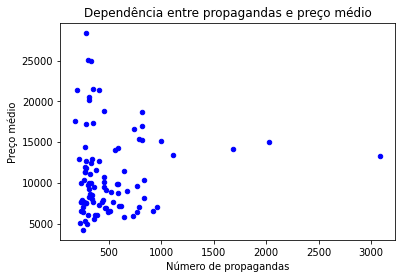

In [277]:
# Plot do gráfico de dependência de preço número de propagandas

# Gerar o scatter plot
ax = df_pivot.plot.scatter(x='contagem', y='preco_medio', color='blue')

# Definir os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Número de propagandas')
ax.set_ylabel('Preço médio')
ax.set_title('Dependência entre propagandas e preço médio')

# Exibir o gráfico
plt.show()

## Fatores de preço


Iremos:

Pegar cada um dos tipos populares que detectamos no estágio anterior e estudar se o preço depende da idade, quilometragem, condição, tipo de transmissão e cor. Para variáveis categóricas (tipo de transmissão e cor), vamos construir gráficos de extremos e quartis, e criar gráficos de dispersão para o restante. 

Ao analisar variáveis categóricas, vamos verificar que as categorias precisam ter pelo menos 50 propagandas; de outro modo, seus parâmetros não serão válidos para análise.

Iremos gerar uma matriz de correlação para os dados e construir e também os gráficos de correlação para cada uma das variáveis não categóricas.

Depois iremos trabalhar com as variáveis categóricas.

In [278]:
# Criar matriz de correlação de dados em newdf
newdf.corr().style.background_gradient(cmap='coolwarm')

,price,model_year,cylinders,odometer,is_4wd,days_listed,mes,ano,idade_carro,quilometragem_media,condition_rate
price,1.000000,0.575005,0.339942,-0.470808,0.348444,-0.002022,-0.010304,0.008641,-0.572913,-0.470808,0.190332
model_year,0.575005,1.000000,-0.137192,-0.612692,0.006856,-0.000567,-0.019691,0.018077,-0.996092,-0.612692,0.275283
cylinders,0.339942,-0.137192,1.000000,0.145182,0.409449,0.002110,0.002107,-0.002459,0.136657,0.145182,-0.087601
odometer,-0.470808,-0.612692,0.145182,1.000000,0.060941,0.004790,0.015646,-0.011656,0.610247,1.000000,-0.269460
is_4wd,0.348444,0.006856,0.409449,0.060941,1.000000,0.003361,0.003756,-0.002626,-0.007073,0.060941,-0.003310
days_listed,-0.002022,-0.000567,0.002110,0.004790,0.003361,1.000000,-0.010275,0.009921,0.001442,0.004790,0.000360
mes,-0.010304,-0.019691,0.002107,0.015646,0.003756,-0.010275,1.000000,-0.817393,-0.052555,0.015646,-0.004342
ano,0.008641,0.018077,-0.002459,-0.011656,-0.002626,0.009921,-0.817393,1.000000,0.070295,-0.011656,0.005649
idade_carro,-0.572913,-0.996092,0.136657,0.610247,-0.007073,0.001442,-0.052555,0.070295,1.000000,0.610247,-0.274148
quilometragem_media,-0.470808,-0.612692,0.145182,1.000000,0.060941,0.004790,0.015646,-0.011656,0.610247,1.000000,-0.269460


In [279]:
# Função de gráfico de correlação

def graph_corr(df, colA, colB):
    return df.plot(x=colA, y=colB, kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='price', ylabel='idade_carro'>

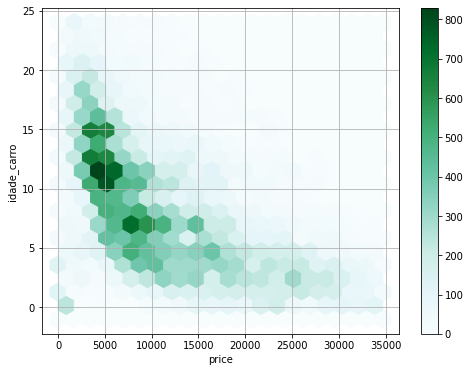

In [280]:
# Gráfico entre preço e idade do carro
graph_corr(newdf,'price','idade_carro')

<AxesSubplot:xlabel='price', ylabel='model_year'>

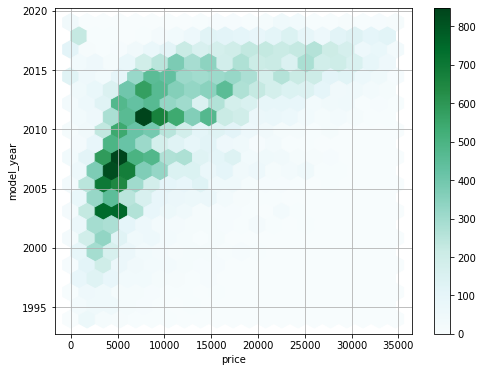

In [281]:
# Gráfico entre preço e ano modelo
graph_corr(newdf,'price','model_year')

<AxesSubplot:xlabel='price', ylabel='odometer'>

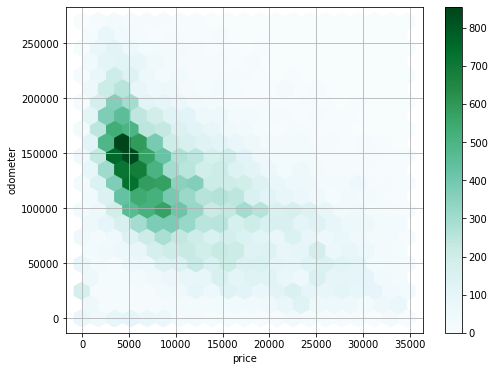

In [282]:
# Gráfico entre preço e quilometragem
graph_corr(newdf,'price','odometer')

<AxesSubplot:xlabel='price', ylabel='condition_rate'>

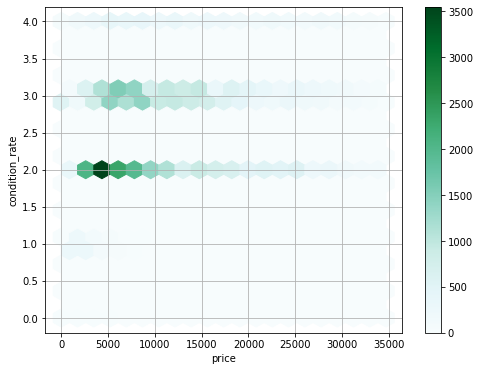

In [283]:
# Gráfico entre preço e condição
graph_corr(newdf,'price','condition_rate')

Agora iremos realizar análise para as variáveis categóricas.

Iremos criar gráficos do tipo boxplot para as variáveis categóricas - transmissão e cor.

Iremos filtrar por pela contagem total das cores e tramissão que tenham > 50 na contagem total por categoria

In [284]:
# Criar df filtrada para transmissão e cor que apareçam mais de 50 vezes na contagem total.

# df filtrada de cor

# Obter contagem dos valores únicos na coluna 'coluna_filtrada'
count_values = df['paint_color'].value_counts()

# Selecionar somente os valores que aparecem mais de 50 vezes
values_over_50 = count_values[count_values > 50].index

# Filtrar DataFrame para conter somente linhas com valores selecionados
paint_df = df[df['paint_color'].isin(values_over_50)]


# df filtrada de transmissão

# Obter contagem dos valores únicos na coluna 'coluna_filtrada'
count_values = df['transmission'].value_counts()

# Selecionar somente os valores que aparecem mais de 50 vezes
values_over_50 = count_values[count_values > 50].index

# Filtrar DataFrame para conter somente linhas com valores selecionados
transmission_df = df[df['transmission'].isin(values_over_50)]

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

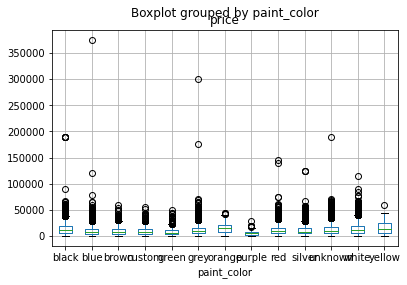

In [285]:
# Gráfico tipo boxplot para df filtrada de cor

paint_df.boxplot(column='price', by='paint_color')

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

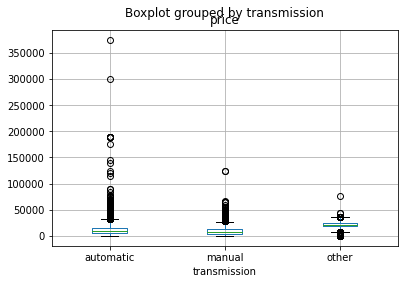

In [286]:
# Gráfico tipo boxplot para df filtrada de transmissão

paint_df.boxplot(column='price', by='transmission')

## Conclusão geral

Primeiramente acerca das relações testadas temos que:

    Estudamos o seguinte:

1) Os parâmetros idade do veículo, quilometragem, número de cilindros e condição tem correlação com o preço.
2) Valores atípicos nas colunas, usando o método de boxplot, a média, mediana, moda, desvios e bigodes.
3) A quantidade de dias que as propagandas ficaram no ar, com média, mediana, moda e desvios.
4) Número de propagandas por tipo de carro e média de preço. Dependência entre as propagandas e o preço médio.

* E os fatores que mais afetaram o preço.
    
Depois de estudar os dados, nós concluímos:

* A maior correlação é entre o preço do carro e a idade do carro. Pelo gráfico de correlação e a matrix gerada podemos ver que é uma relação negativa, ou seja, quanto menor a idade do carro maior o preço do carro. Isso faz sentido, uma vez que quanto mais novo o carro mais caro será.

* A correlação entre a quilometragem e o preço também é importante e, também, é de maneira negativa. Ou seja, maior a quilometragem menor o preço do carro. Também faz sentido, assim quanto mais usado maior a depreciação do bem.

* A condição do carro não tem uma correlação tão forte, podemos ver na matriz e pelo gráfico de correlação, visto que os dados gerados não são centrais e estão espaçados. 

* Acerca dos dados categóricos para a transmissão é possível ver que a transmissão automática tem valores mais altos do que manual. Podemos ver pela mediana dos dados e também pelo tamanho da caixa gerada. A cor do carro tem caixas muito parecidas na mediana, mas podemos observar que os carros amarelos, laranja e brancos tem a mediana de preços maiores que os demais.

* A média de tempo das propagandas é de 40 dias, aproximadamente. A mediana 33 dias e a o valor mais comum de exibição das propagandas é de 18 dias.

* Para os valores atípicos realizamos a criação de gráficos do tipo boxplot e calculamos os bigodes. Retiramos os dados fora do bigode superior. Os dados que tinham valores atípicos eram do preço, idade do carro e a condição. Os cilindros corrigimos inicialmente na parte de processamento de dados. Após a retirada dos dados atípicos pudemos observar que geramos gráficos de distribuição em histograma mais normalizados ou seja as curvas tiveram mais características de onda.

* Os tipos de carros com mais número de propagandas são a ford f150 e Chevrolet Silverado 1500. A ford f150 tem quase 30% a mais propagandas que o segundo colocado no ranking. Pelo gráfico gerado de dependência do preço pelo número de propagandas é possível ver que a maior parte dos carros tem número de propagandas menor que 1000.  O preço para esse grupo é normalmente menor que $12k.

* No gráfico de dependência podemos ver que os grupos com mais propagandas são os que tem preço mediano em todos os dados. Os carros com maiores preços são os que aparecem menos. Ou seja, quanto maior o preço do carro menor a tendência de propagandas.


Acerca do processamento de dados:

É possível observar que a parte mais árdua e importante do processo de análise de dados é o pré-processamento e processamento de dados, pois podemos ter uma visão errônea no teste final. Neste caso tivemos uma grande quantidade de valores ausentes em várias colunas. Realizamos testes para analisar a viabilidade de substituição de valores, pois se excluíssemos todos os valores teríamos uma base de dados muito menor do que a inicial.

Realizamos substituições em model_year, pelo data do veículo. Iteramos sobre todos os valores do ano e substituímos os valores por grupos de preços. Fizemos isso utilizando os desvios padrão por ano e substituímos pelo valor que estava dentro deste grupo.

Para as cilindradas trabalhamos com valores que eram mais lógicos e retiramos valores que não faziam sentido. Para a coluna de quilometragem realizamos o mesmo método que em model_year e limpamos os dados. 

A coluna de cor acabamos não substituindo dados, pois como é um dado categorizado e de maneira muito aleatória poderíamos trazer erros muito grandes para nossas análises finais. Substituímos os valores inexistentes por ‘unknown’.

A coluna is_4wd era do tipo booleano e estava de maneira errada, substituímos valores nulos por 0.

Corrigimos os dados em todas as colunas e retiramos dados duplicatas implícitos. A coluna model possuía várias duplicatas implícitas e se não tivéssemos feito as correções nossas analises finais teriam sido afetadas.

A coluna de data foi alterada pra datetime.

Enriquecemos os dados adicionado valores para os dados categorizados como notas de 0-5 para o estado do carro. Criamos colunas somente para mas e anos e a média de quilometragem por ano.

No final pudemos ver que o processo até a análise exploração de dados pode ser extensa e é uma das mais delicadas, pois afeta todo o futuro da análise. 

A análise de exploração dos dados é de extrema importância para entendimento do comportamento dos dados que vamos trabalhar e sem ela poderemos arrastar erros. As análises boxplot, histograma e distribuição se fazem muito importante assim como a matriz de correlação.